In [30]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
from scipy.stats import linregress

from config import census_key,g_key

gmaps.configure(g_key)

In [31]:
data = pd.read_csv("../Output/Data/census_data.csv")
data

,city,zipcode,population,per_capita_income,white,african_american,native_american,asian,native_hawaiian_pacific_islander,other_race,two_or_more_races,white_not_hispanic,hispanic_or_latino
0,Philadelphia,19102,4937.0,87197.0,3842.0,220.0,11.0,809.0,0.0,14.0,41.0,3583.0,259.0
1,Philadelphia,19103,24219.0,78815.0,18731.0,1499.0,72.0,2840.0,31.0,103.0,943.0,17468.0,1377.0
2,Philadelphia,19104,54311.0,15478.0,20419.0,22962.0,291.0,7662.0,62.0,838.0,2077.0,18782.0,2766.0
3,Philadelphia,19106,12375.0,82364.0,10179.0,1054.0,0.0,798.0,0.0,62.0,282.0,9495.0,797.0
4,Philadelphia,19107,13696.0,49131.0,8085.0,1117.0,73.0,3720.0,0.0,131.0,570.0,7600.0,703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Seattle,98136,16607.0,60543.0,14120.0,622.0,55.0,729.0,13.0,253.0,815.0,13569.0,949.0
178,Seattle,98144,31845.0,49610.0,15333.0,5316.0,363.0,6341.0,49.0,2056.0,2387.0,13943.0,3772.0
179,Seattle,98164,155.0,163222.0,123.0,0.0,0.0,32.0,0.0,0.0,0.0,123.0,0.0
180,Seattle,98177,21619.0,59544.0,17824.0,325.0,154.0,1735.0,0.0,196.0,1385.0,17167.0,882.0


In [32]:
bycity = data.groupby("city").sum()
bycity.iloc[:,1:].head()

,population,per_capita_income,white,african_american,native_american,asian,native_hawaiian_pacific_islander,other_race,two_or_more_races,white_not_hispanic,hispanic_or_latino
city,,,,,,,,,,,
Atlanta,675827.0,1211217.0,267372.0,354356.0,3727.0,24602.0,202.0,8816.0,16752.0,245199.0,37535.0
Dallas,1734824.0,2222587.0,1125288.0,355474.0,6133.0,88972.0,791.0,114476.0,43690.0,643841.0,615680.0
Indianapolis,645767.0,662818.0,373849.0,207944.0,2122.0,13596.0,395.0,26610.0,21251.0,330747.0,73514.0
Philadelphia,1575729.0,1446073.0,649097.0,666047.0,5843.0,112651.0,769.0,93651.0,47671.0,545853.0,227849.0
Seattle,712024.0,1557262.0,494041.0,46271.0,3999.0,101546.0,2321.0,15820.0,48026.0,469128.0,46277.0


In [33]:
races = bycity.columns[3:]

for race in races:
    bycity[f'{race}%'] = bycity[race]/bycity['population']

In [35]:
bycity.columns

Index(['zipcode', 'population', 'per_capita_income', 'white',
       'african_american', 'native_american', 'asian',
       'native_hawaiian_pacific_islander', 'other_race', 'two_or_more_races',
       'white_not_hispanic', 'hispanic_or_latino', 'white%',
       'african_american%', 'native_american%', 'asian%',
       'native_hawaiian_pacific_islander%', 'other_race%',
       'two_or_more_races%', 'white_not_hispanic%', 'hispanic_or_latino%'],
      dtype='object')

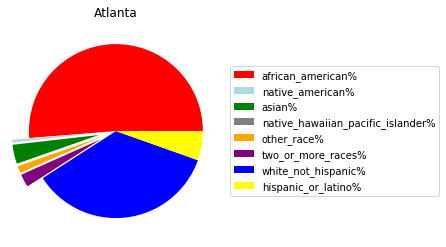

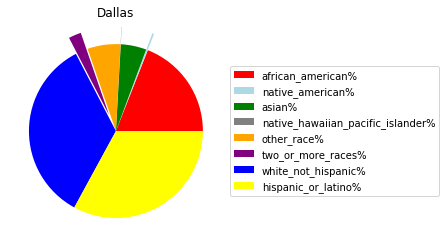

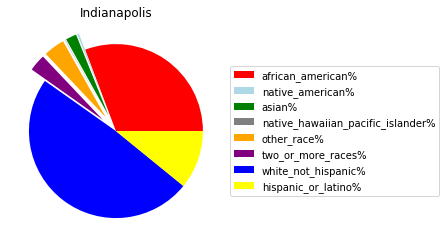

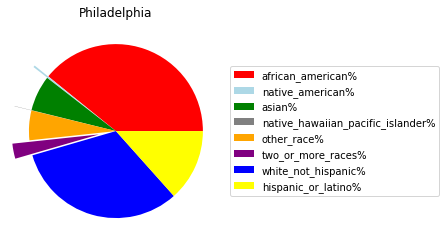

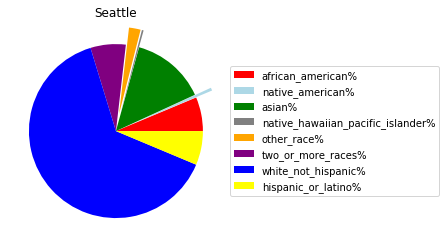

In [36]:
labels = bycity.columns[13:]
colours = ('red','lightblue','green','grey','orange','purple','blue','yellow')
for i,row in bycity.iterrows():
    sizes = row[13:]
    explode = row[13:].apply(lambda x:x < 0.05)
    explode = explode.apply(lambda x:0.2 if x == True else 0)
    plt.pie(sizes,colors = colours, explode = explode)
    plt.legend(labels, loc = 'center left',bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(i)    
    plt.savefig(f"../Output/Charts/piechart_race_{i}.png",bbox_inches='tight')
    plt.show()

In [22]:
bycity.columns

Index(['zipcode', 'population', 'per_capita_income', 'white',
       'african_american', 'native_american', 'asian',
       'native_hawaiian_pacific_islander', 'other_race', 'two_or_more_races',
       'white_not_hispanic', 'hispanic_or_latino', 'white%',
       'african_american%', 'native_american%', 'asian%',
       'native_hawaiian_pacific_islander%', 'other_race%',
       'two_or_more_races%', 'white_not_hispanic%', 'hispanic_or_latino%'],
      dtype='object')

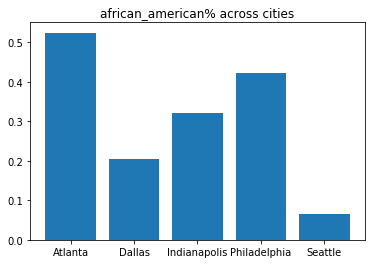

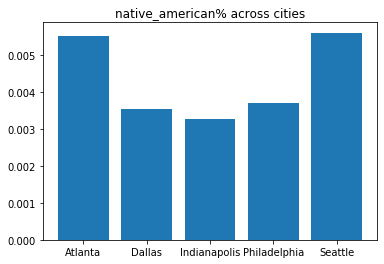

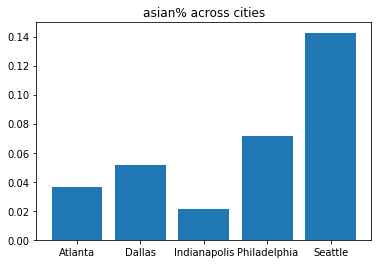

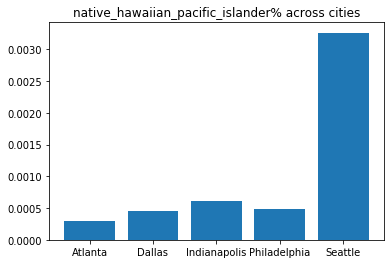

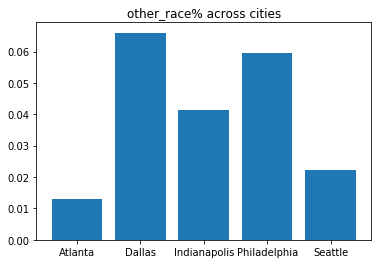

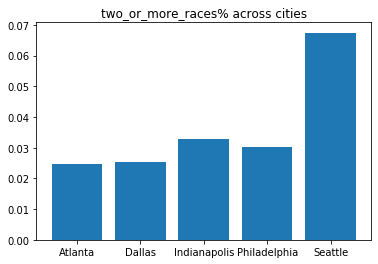

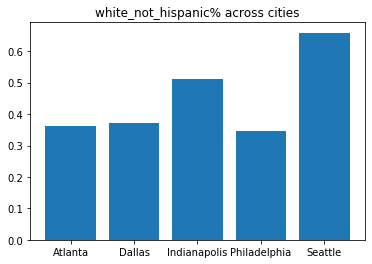

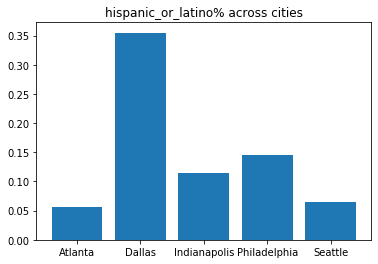

In [23]:
races = bycity.columns[13:]
for race in races: 
    plt.bar(bycity.index,bycity[race])
    plt.title(f"{race} across cities")
    plt.savefig(f"../Output/Charts/barchart_city_compare_{race}.png")
    plt.show()

In [37]:
data = pd.read_csv("../Output/Data/census_data.csv")
byzipcode = data.copy()
races = byzipcode.columns[4:]
for race in races:
    byzipcode[f'{race}%'] = byzipcode[race]/byzipcode['population']

lat_log = pd.read_csv('../Resources/us-zip-code-latitude-and-longitude.csv', sep = ';')
lat_log = lat_log[['Zip','geopoint']]

byzipcode = pd.merge(lat_log,byzipcode, how = 'right', right_on = 'zipcode', left_on = 'Zip')
byzipcode.drop(columns= 'zipcode', inplace = True)
byzipcode.rename(columns = {'Zip':'zipcode'},inplace = True)
byzipcode.head()

,zipcode,geopoint,city,population,per_capita_income,white,african_american,native_american,asian,native_hawaiian_pacific_islander,...,hispanic_or_latino,white%,african_american%,native_american%,asian%,native_hawaiian_pacific_islander%,other_race%,two_or_more_races%,white_not_hispanic%,hispanic_or_latino%
0,46214,"39.792993,-86.28575",Indianapolis,24202.0,26462.0,12760.0,8746.0,30.0,446.0,189.0,...,3312.0,0.527229,0.361375,0.001240,0.018428,0.007809,0.035865,0.048054,0.450459,0.136848
1,75087,"32.93382,-96.45446",Dallas,33638.0,39436.0,30220.0,954.0,90.0,873.0,0.0,...,4076.0,0.898389,0.028361,0.002676,0.025953,0.000000,0.017926,0.026696,0.797342,0.121172
2,30336,"33.744007,-84.56032",Atlanta,234.0,42524.0,33.0,186.0,0.0,7.0,0.0,...,11.0,0.141026,0.794872,0.000000,0.029915,0.000000,0.000000,0.034188,0.123932,0.047009
3,19104,"39.961612,-75.19957",Philadelphia,54311.0,15478.0,20419.0,22962.0,291.0,7662.0,62.0,...,2766.0,0.375964,0.422787,0.005358,0.141076,0.001142,0.015430,0.038243,0.345823,0.050929
4,19146,"39.938512,-75.18067",Philadelphia,38873.0,45507.0,18549.0,16645.0,120.0,1701.0,35.0,...,1799.0,0.477169,0.428189,0.003087,0.043758,0.000900,0.015023,0.031873,0.446042,0.046279


In [38]:
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

lat = [float(point.split(',')[0]) for point in byzipcode['geopoint'] ]
lng = [float(point.split(',')[1]) for point in byzipcode['geopoint'] ]
zip_locations = []
for i in range(len(lat)):
    zip_locations.append((lat[i],lng[i]))
    
heatmap_layer = gmaps.heatmap_layer(zip_locations,
                                    weights = byzipcode['per_capita_income'], 
                                    max_intensity= 100000.0,
                                    point_radius = 35)

fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [26]:
byzipcode.columns

Index(['zipcode', 'geopoint', 'city', 'population', 'per_capita_income',
       'white', 'african_american', 'native_american', 'asian',
       'native_hawaiian_pacific_islander', 'other_race', 'two_or_more_races',
       'white_not_hispanic', 'hispanic_or_latino', 'white%',
       'african_american%', 'native_american%', 'asian%',
       'native_hawaiian_pacific_islander%', 'other_race%',
       'two_or_more_races%', 'white_not_hispanic%', 'hispanic_or_latino%'],
      dtype='object')

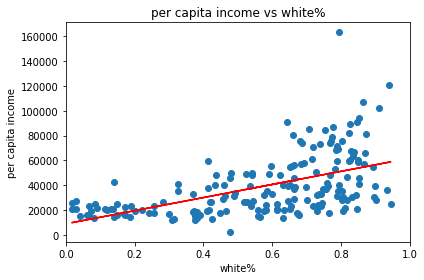

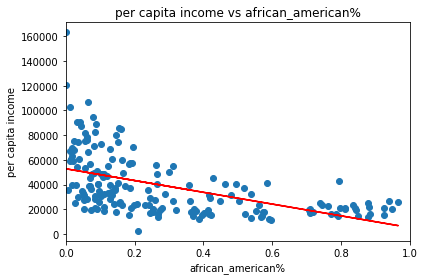

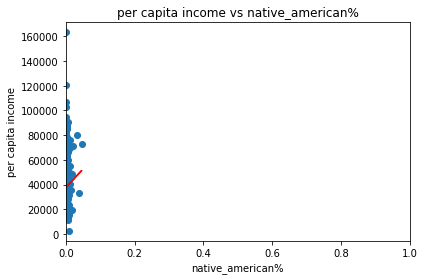

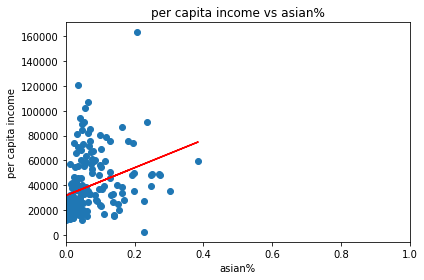

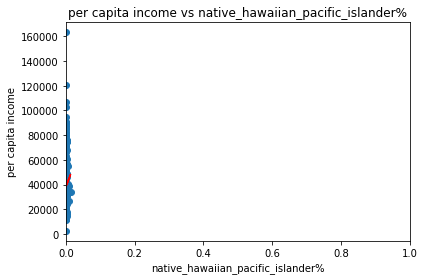

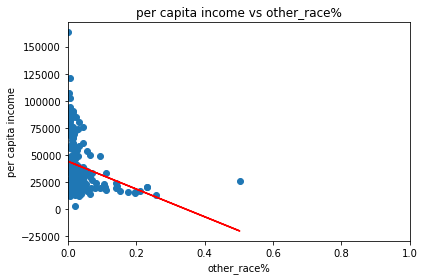

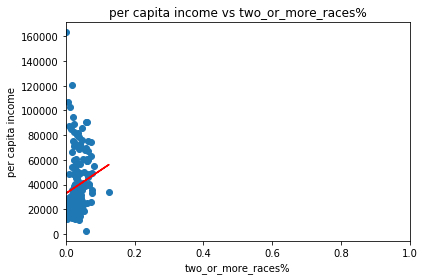

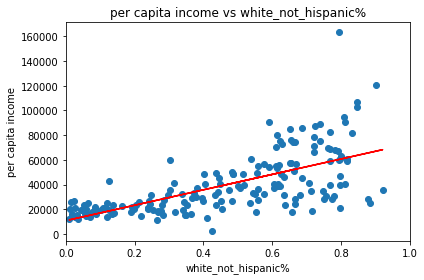

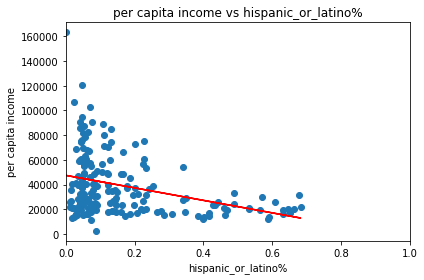

In [50]:
races_p = byzipcode.columns[14:]

for race_p in races_p:
    
    x_values = byzipcode[f'{race_p}']
    y_values = byzipcode['per_capita_income']
    
    plt.scatter(x_values,y_values)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    
    plt.title(f'per capita income vs {race_p}')
    plt.xlim([0,1])
    plt.xlabel(f'{race_p}')
    plt.ylabel('per capita income')
    
    plt.tight_layout()
    
    plt.savefig(f'../Output/Charts/scatterchart_income_vs_{race_p}.png')
    
    plt.show()